In [1]:
import os
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import anndata as ad

sc.set_figure_params(figsize=(4, 4), frameon=False)

%load_ext lab_black

### Prepare spatial data

In [2]:
path_raw = pathlib.Path("/Users/giovanni.palla/Datasets/advomics/dh-anndata")

In [3]:
G = 2000
files = os.listdir(path_raw)
ad_raw = {}
for f in files:
    adata = sc.read(path_raw / f)
    adata.var_names_make_unique()
    adata.obs_names_make_unique()
    adata.layers["counts"] = adata.X.copy()
    sc.pp.filter_genes(adata, min_counts=10)
    sc.pp.highly_variable_genes(
        adata, n_top_genes=G, layer="counts", flavor="seurat_v3"
    )
    sc.pp.normalize_total(adata, target_sum=10e4)
    sc.pp.log1p(adata)
    sc.pp.pca(adata, use_highly_variable=True)
    sc.pp.neighbors(adata)
    sc.tl.umap(adata)
    sc.tl.leiden(adata)
    ad_raw[f.strip(".h5ad")] = adata

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [4]:
adata_concat = ad.concat(
    ad_raw,
    label="library_id",
    uns_merge="unique",
    pairwise=True,
)

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


/Users/giovanni.palla/miniconda3/envs/advomics/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'leiden' as categorical


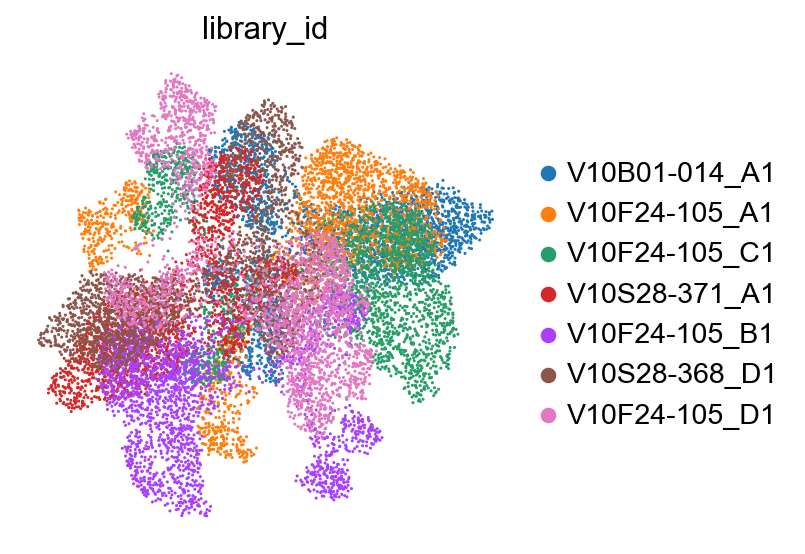

In [5]:
sc.pl.umap(adata_concat, color="library_id")

In [6]:
adata_concat.X = adata_concat.layers["counts"].copy()
sc.pp.highly_variable_genes(
    adata_concat, n_top_genes=G, layer="counts", flavor="seurat_v3"
)
sc.pp.normalize_total(adata_concat, target_sum=10e4)
sc.pp.log1p(adata_concat)
sc.pp.pca(adata_concat, use_highly_variable=True)
sc.pp.neighbors(adata_concat)
sc.tl.umap(adata_concat)
sc.tl.leiden(adata_concat)

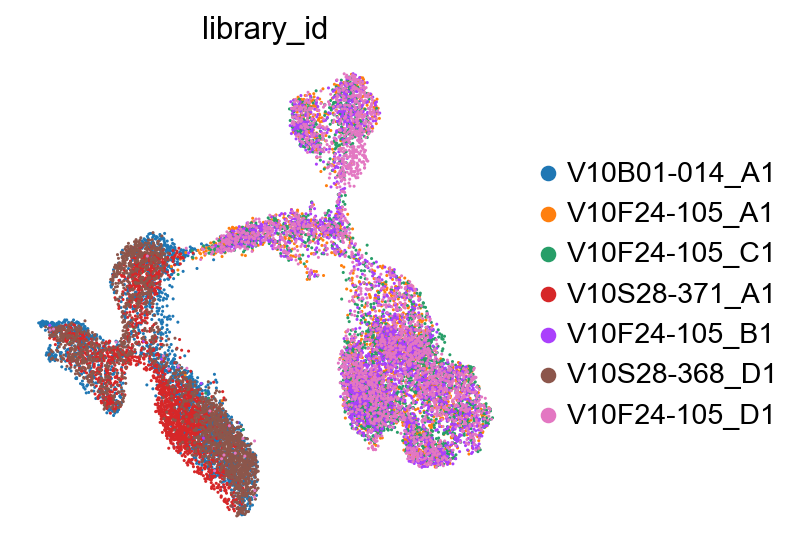

In [7]:
sc.pl.umap(adata_concat, color="library_id")

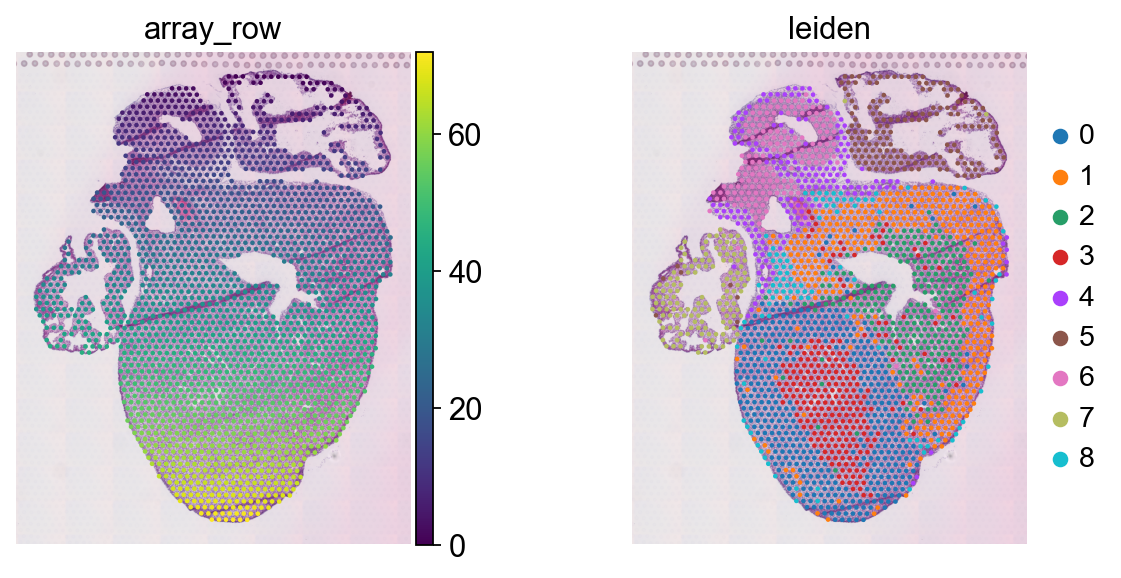

In [8]:
sc.pl.spatial(ad_raw["V10F24-105_A1"], color=["array_row", "leiden"])

In [10]:
path_save = pathlib.Path(
    "/Users/giovanni.palla/Datasets/advomics/advomics_data_spatial"
)
for k, adata in ad_raw.items():
    adata.write(path_save / f"{k}.h5ad")

In [11]:
adata_concat.write(path_save / f"dh_spatial.h5ad")

### Prepare sc data

In [12]:
path_sc = pathlib.Path("/Users/giovanni.palla/Datasets/advomics")
adata_sc = sc.read(path_sc / "GSE156793_fetal_heart_scNym_RAW_ctl201119.h5ad")

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [13]:
adata_sc.obs

,All_reads,Assay,Batch,Development_day,Exon_reads,Experiment_batch,Fetus_id,Intron_reads,Main_cluster_name,Main_cluster_umap_1,...,sample,n_genes,combined,_scvi_batch,_scvi_labels,_scvi_local_l_mean,_scvi_local_l_var,n_counts,scNym,scNym_confidence
exp4-human-100well.GGCGACTATTGCCGGCAGA-1-0-0-0-0-0-0-0-0-0-0,495,Nuclei,5,113,423,exp4,H26547,29,Cardiomyocytes,0.729675,...,exp4-human-100well.GGCGACTATTGCCGGCAGA,286,H26547exp4,0,0,4.325110,0.520442,450.0,aCM1,0.743529
exp4-human-100well.AGTCGCATTGGCTATGACT-1-0-0-0-0-0-0-0-0-0-0,405,Nuclei,7,122,290,exp4,H27464,82,CLC_IL5RA positive cells,0.960096,...,exp4-human-100well.AGTCGCATTGGCTATGACT,276,H27464exp4,5,0,4.271665,0.551099,370.0,vCM1,0.187351
exp4-human-100well.CATCAACGTTGCCGGCAGA-1-0-0-0-0-0-0-0-0-0-0,454,Nuclei,5,113,408,exp4,H26547,17,Cardiomyocytes,0.816427,...,exp4-human-100well.CATCAACGTTGCCGGCAGA,237,H26547exp4,0,0,4.325110,0.520442,423.0,aCM1,0.791351
exp4-human-100well.ATTCGGAGTACGGAGGCGG-1-0-0-0-0-0-0-0-0-0-0,2029,Nuclei,5,113,1668,exp4,H26547,182,Cardiomyocytes,0.754116,...,exp4-human-100well.ATTCGGAGTACGGAGGCGG,1016,H26547exp4,0,0,4.325110,0.520442,1830.0,aCM1,0.455600
exp4-human-100well.TGGTTGAATTCTAACTAGAT-1-0-0-0-0-0-0-0-0-0-0,575,Nuclei,5,113,499,exp4,H26547,24,Cardiomyocytes,0.828282,...,exp4-human-100well.TGGTTGAATTCTAACTAGAT,293,H26547exp4,0,0,4.325110,0.520442,519.0,aCM1,0.627999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
exp5-human-864well.CTGCCTTATAATCTGGAGT-1-0-0-0-0-0-0-0-0-0-0,881,Nuclei,2,90,496,exp5,H27473,189,Cardiomyocytes,1.326766,...,exp5-human-864well.CTGCCTTATAATCTGGAGT,529,H27473exp5,8,0,4.418755,0.535561,684.0,aCM1,0.150885
exp5-human-864well.ATTAGGTACTGGATCTGCAG-1-0-0-0-0-0-0-0-0-0-0,663,Nuclei,2,90,133,exp5,H27473,419,Cardiomyocytes,1.314312,...,exp5-human-864well.ATTAGGTACTGGATCTGCAG,388,H27473exp5,8,0,4.418755,0.535561,548.0,vCM1,0.952824
exp5-human-864well.GTAGCGATTAATCTGGAGT-1-0-0-0-0-0-0-0-0-0-0,594,Nuclei,2,90,474,exp5,H27473,32,Cardiomyocytes,0.978934,...,exp5-human-864well.GTAGCGATTAATCTGGAGT,396,H27473exp5,8,0,4.418755,0.535561,495.0,vCM1,0.688023
exp5-human-864well.CCAGCCTTTAGCTAAGGTA-1-0-0-0-0-0-0-0-0-0-0,337,Nuclei,2,90,126,exp5,H27473,147,Vascular endothelial cells,1.338734,...,exp5-human-864well.CCAGCCTTTAGCTAAGGTA,241,H27473exp5,8,0,4.418755,0.535561,271.0,EC1_cap,0.254192


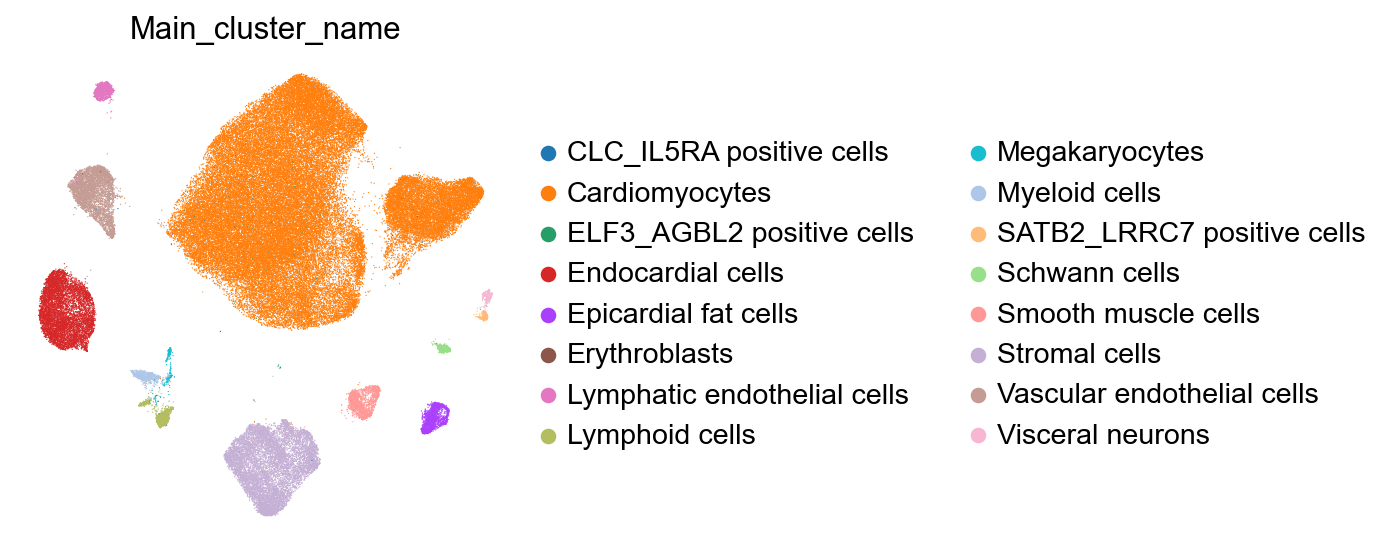

In [14]:
sc.pl.umap(adata_sc, color="Main_cluster_name")

In [15]:
adata_sc.layers["counts"] = adata_sc.X.copy()

In [16]:
path_save = pathlib.Path(
    "/Users/giovanni.palla/Datasets/advomics/advomics_data_spatial"
)
adata_sc.write(path_save / f"dh_sc.h5ad")